**рынок**: США

**период**: 2020 год

Седунов Илья,

Альперович Вадим, 

Славутин Александр, 

17ПМИ.

### 1. Сбор данных NASDAQ : 2020-04-01 - 2020-10-29

In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import seaborn as sns
from seaborn import set_style
set_style('dark')
warnings.simplefilter('ignore')

In [9]:
start = "2020-04-01"
end   = "2020-10-30"
ixic_components = pd.read_csv('data/top30_nasdaq_symbols.csv')
ixic_stat = pd.DataFrame(columns=['names', 'E', 'Sigma', 'mean_vol', 'n_observations'])
ixic_stocks = {}

for index, row in tqdm(ixic_components.iterrows(), total=len(ixic_components)):
    symbol, name = row
    ixic_stock = yf.download(symbol, start=start, end=end, progress=False)
    ixic_stock['return'] = ixic_stock['Close'] / ixic_stock['Close'].shift(1)
    ixic_stock['log_return'] = np.log(ixic_stock['return'])
    ixic_stock = ixic_stock.dropna()
    ixic_stocks[symbol] = ixic_stock
    ixic_stat.loc[symbol] = [name,
                           ixic_stock['log_return'].mean(),
                           ixic_stock['log_return'].std(),
                           ixic_stock['Volume'].mean(),
                           len(ixic_stock)]
ixic_stat['symbol'] = ixic_stat.index

100%|██████████| 30/30 [00:06<00:00,  4.44it/s]


In [10]:
# # IXIC index

ixic = yf.download('^IXIC', start=start, end=end, progress=False)
ixic['return'] = ixic['Close'] / ixic['Close'].shift(1)
ixic['log_return'] = np.log(ixic['return'])
ixic.dropna(inplace=True)
print('IXIC index')
ixic.head(2)

IXIC index


,Open,High,Low,Close,Adj Close,Volume,return,log_return
Date,,,,,,,,
2020-04-01,7459.500000,7566.370117,7301.979980,7360.580078,7360.580078,3685510000,0.955907,-0.045095
2020-04-02,7317.450195,7501.700195,7307.950195,7487.310059,7487.310059,3608190000,1.017217,0.017071


In [11]:
ixic_stat['sharp'] = ixic_stat['E'] / (ixic_stat['Sigma'])
ixic_stat

,names,E,Sigma,mean_vol,n_observations,symbol,sharp
OPTT,Ocean Power Technologies Inc,0.010764,0.103097,5.458718e+06,148,OPTT,0.104408
NMRD,Nemaura Medical Inc.,-0.003255,0.071546,5.629865e+04,148,NMRD,-0.045489
FNKO,Funko Inc.,0.003318,0.055569,8.634486e+05,148,FNKO,0.059712
KLXE,KLX Energy Services Holdings Inc.,0.000851,0.094137,4.595615e+05,148,KLXE,0.009044
BBI,Brickell Biotech Inc.,-0.005465,0.072325,1.785730e+06,148,BBI,-0.075563
WMG,Warner Music Group Corp.,-0.000949,0.019861,1.143610e+06,104,WMG,-0.047769
SDC,SmileDirectClub Inc.,0.004647,0.058970,7.084780e+06,148,SDC,0.078805
CIIC,CIIG Merger Corp.,0.000226,0.005179,5.949054e+04,148,CIIC,0.043645
TWST,Twist Bioscience Corporation,0.006444,0.041817,5.391939e+05,148,TWST,0.154088
SCOR,comScore Inc.,-0.002424,0.053969,3.474568e+05,148,SCOR,-0.044908


In [12]:
def get_return_mean_cov(df, sse_components=False): 
    
    # получить по выбранным активам матрицу их доходностей, 
    # вектор средних доходностей и матрицу ковариации
    
    r_matrix = {}
    if sse_components:
        for i in range(len(df)):
            symbol = df.index[i]
            r_matrix[symbol] = sse_stocks[symbol]['log_return']
    else:
        for symbol in df['symbol']:
            r_matrix[symbol] = ixic_stocks[symbol]['log_return'] 
    r_df = pd.DataFrame(r_matrix).dropna()
    return r_df.values, r_df.mean().values, r_df.cov().values

def plot_mean_var_map(df,x='Sigma', y='E', title='Карта активов:σ от E', figsize=(12, 6)):
    ax = df.plot(x=x, y=y, s=np.log(df['mean_vol']**3), 
                          kind='scatter', 
                          figsize=figsize, 
                          edgecolor='black',
                          grid=True)
    plt.xlabel('Sigma', size=15)
    plt.ylabel('E', size=15)
    plt.title(title, size=16)

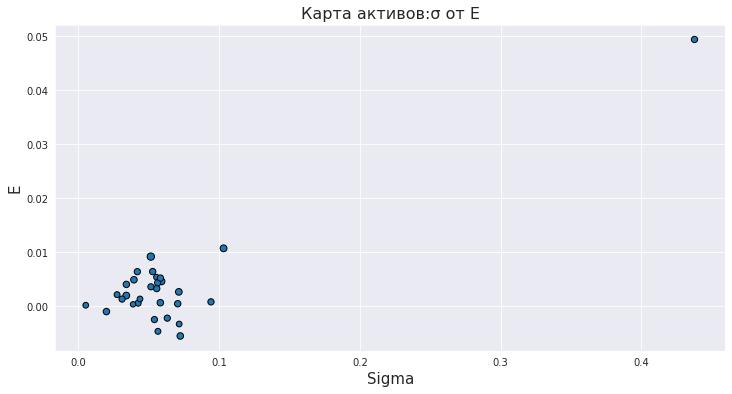

In [13]:
plot_mean_var_map(ixic_stat)

In [14]:
from scipy.optimize import minimize

def risk_porfolio(X, cov_matrix, n_observations=1, sqrt=True):
    # риск портфеля
    if sqrt:
        return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
    else:
        return np.dot(np.dot(X, cov_matrix), X.T) / np.sqrt(n_observations)

def optimize_portfolio(risk_porfolio,
                       returns,
                       mean_returns, 
                       cov_matrix, 
                       bounds,
                       target_return=None):
    
    # оптимизатор с итеративным методом МНК SLSQP
    # решает задачу мимнимизации уравнения Лагранжа 
    
    X = np.ones(returns.shape[1])
    X = X / X.sum()
    bounds = bounds * returns.shape[1]

    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target_return:
        constraints.append({'type': 'eq', 
                            'args': (mean_returns,), 
                            'fun': lambda X, mean_returns: portfolio_return - np.dot(X, mean_returns)})

    return minimize(risk_porfolio, X,
                    args=(cov_matrix, returns.shape[0]), 
                    method='SLSQP',
                    constraints=constraints,
                    bounds=bounds).x

In [18]:
psigmas_ns = []
preturns_ns = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(ixic_stat)


X_min_risk_ns = optimize_portfolio(risk_porfolio,
                                   r_matrix,
                                   mean_vec,
                                   cov_matrix,
                                   bounds)
min_risk_ns = risk_porfolio(X_min_risk_ns, cov_matrix)
min_risk_preturn_ns = np.dot(X_min_risk_ns, mean_vec)
target_range = np.linspace(min_risk_preturn_ns, 0.1, 500)


for portfolio_return in tqdm(target_range):
    X_ns = optimize_portfolio(risk_porfolio,
                                       r_matrix,
                                       mean_vec,
                                       cov_matrix,
                                       bounds, 
                                       target_return=portfolio_return)
    psigmas_ns.append(risk_porfolio(X_ns, cov_matrix))
    preturns_ns.append(np.dot(X_ns, mean_vec))

100%|██████████| 500/500 [00:17<00:00, 28.29it/s] 


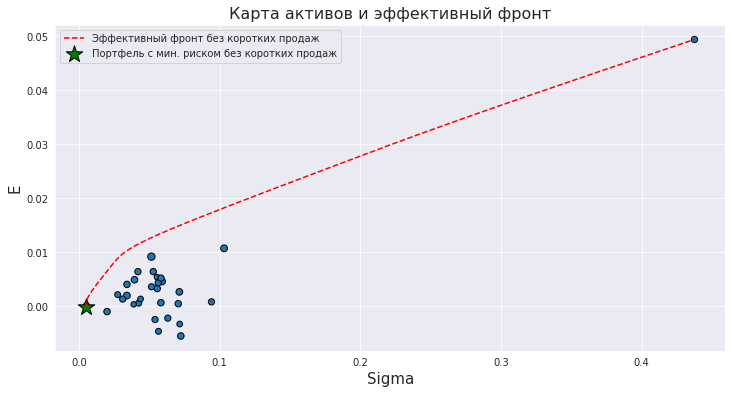

In [19]:
plot_mean_var_map(ixic_stat, title='Карта активов и эффективный фронт')
plt.plot(psigmas_ns, preturns_ns, 'r--', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns, 
            min_risk_preturn_ns,
            c='green',
            marker='*', 
            s=300, 
            edgecolors='black',
            label='Портфель с мин. риском без коротких продаж')
plt.legend()
plt.show()

## 2. Local Search отбора активов

In [28]:
from itertools import combinations
import copy

class IteratedLocalSearch:
    
    def __init__(self, 
                 solution, 
                 stocks,
                 verbose=False,
                 n_iter=100):
    
        self.solution = solution
        self.stocks = stocks
        self.n = solution.shape[0]
        self.verbose = verbose
        self.n_iter = n_iter
        self.k_bounds  = {'min': int(self.n * 0.5),
                          'max': int(self.n * 0.75),
                          'curr': int(self.n * 0.5)}
        self.history = []
        
    
    def LocalSearchSolver(self):
        alg = LocalSearch(self.solution, self.stocks)
        local_search_solve = alg.first_improvement()
        return local_search_solve, alg.cur_cost
    
           
    def perturbation(self):
        start_ind = random.randint(0, self.n - self.k_bounds['curr'])
        end_ind = start_ind + self.k_bounds['curr']
        if end_ind > self.n:
            end_ind = int(end_ind % self.n)
            self.solution[start_ind:self.n] = np.random.permutation(self.solution[start_ind:end_ind])
            self.solution[0:end_ind] = np.random.permutation(self.solution[0:end_ind])
        else:
            self.solution[start_ind:end_ind] = np.random.permutation(self.solution[start_ind:end_ind])
            
    def solve(self):
        
        self.solution, self.cur_cost = self.LocalSearchSolver()
        if self.verbose:
            print('Start cost: {}'.format(self.cur_cost))
        self.last_state = 0
        self.best_solution = self.solution
        for i in tqdm(range(self.n_iter),
                               position=0,
                               disable=not self.verbose):
            self.perturbation()
            local_search_solve, cost = self.LocalSearchSolver()
            self.history.append(cost)
            if cost < self.cur_cost:
                self.cur_cost = cost
                self.solution = copy.copy(local_search_solve)
                self.best_solution = copy.copy(local_search_solve)
                self.last_state = i

                self.k_bounds['curr'] += 1
                if self.k_bounds['curr'] == self.k_bounds['max']:
                    self.k_bounds['curr'] = self.k_bounds['min']
            else:
                self.k_bounds['curr'] = self.k_bounds['min']

        if self.verbose:
            print('End cost: {}'.format(self.cur_cost))
        self.solution = self.best_solution
        return self.solution
    
    def get_history(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.history, label='функция потерь')
        plt.plot(self.last_state,
                 self.history[self.last_state],
                 'o', label='выбранный оптимум')
        plt.grid()
        plt.legend()
        return self.history
        

class LocalSearch:
    
    def __init__(self, 
                 solution, 
                 stocks,
                 verbose=False,
                 n_iter=4):
        self.solution = solution
        self.stocks = stocks
        self.n = solution.shape[0]
        self.verbose = verbose
        self.cur_cost = self.cost_function(solution)
        self.n_iter = n_iter
 
    def cost_function(self, solution):
        X  =  np.ones(20) / 20 
        r_matrix, mean_vec, cov_matrix = get_return_mean_cov(self.stocks[solution==1])
        return - np.dot(mean_vec, X) / risk_porfolio(X, cov_matrix)
    
        
    def first_improvement(self):

        if self.verbose:
            print('Start cost {}'.format(round(self.cur_cost,3)))

        comb       = list(combinations(np.arange(self.n, dtype=np.int32), 2))
        dont_look  = {x:np.zeros(self.n, dtype=np.int32) for x in range(self.n)}
        for i in tqdm(range(self.n_iter),
                      position=0,
                      disable=not self.verbose):

            flag = True
            for opt in comb:
                if (sum(dont_look[opt[0]]) >= 19 or
                    sum(dont_look[opt[1]]) >= 19):
                    continue
                opt = list(opt)
                tmp_solution      = copy.copy(self.solution)
                tmp_solution[opt] = tmp_solution[opt][::-1]
                cost = self.cost_function(tmp_solution)
                if cost < self.cur_cost:
                    self.cur_cost = cost
                    self.solution = tmp_solution
                    flag = False
                    break
                dont_look[opt[0]][opt[1]] = 1
                dont_look[opt[1]][opt[0]] = 1
            if flag and self.verbose:
                print('No better solutions, stoping...')
                break

        if self.verbose:
            end_cost = self.cost_function(self.solution)
            print('End cost {}'.format(round(end_cost, 3)))
        return self.solution

In [29]:
import random

initial_solution = np.zeros(ixic_stat.shape[0] , dtype=np.int)
arange = np.arange(ixic_stat.shape[0])
initial_solution[random.sample(arange.tolist(), k=20)] = 1
# ixic_stat[initial_solution==1]

In [30]:
lsearch = IteratedLocalSearch(initial_solution, ixic_stat, n_iter=500, verbose=True)

In [31]:
solution = lsearch.solve()
selected20 = ixic_stat[solution==1]

  0%|          | 0/500 [00:00<?, ?it/s]

Start cost: -0.1394941208646767


100%|██████████| 500/500 [01:31<00:00,  5.48it/s]

End cost: -0.17736457022694876


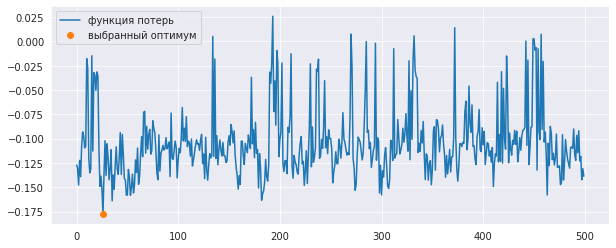

In [32]:
_ = lsearch.get_history()

In [33]:
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20)

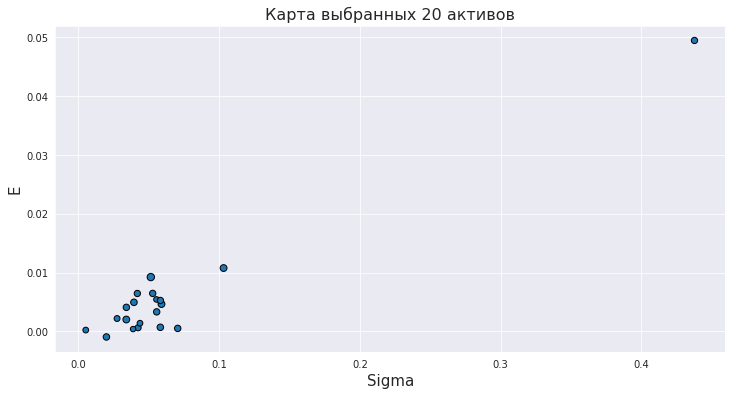

In [34]:
plot_mean_var_map(selected20, title='Карта выбранных 20 активов')

In [36]:
psigmas_ns20 = []
preturns_ns20 = []
bounds = ((0.0, 1.0),) 
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20)


X_min_risk_ns20 = optimize_portfolio(risk_porfolio,
                                   r_matrix,
                                   mean_vec,
                                   cov_matrix,
                                   bounds)
min_risk_ns20 = risk_porfolio(X_min_risk_ns20, cov_matrix)
min_risk_preturn_ns20 = np.dot(X_min_risk_ns20, mean_vec)
target_range = np.linspace(min_risk_preturn_ns20, 0.2, 100)


for portfolio_return in tqdm(target_range):
    X_ns20 = optimize_portfolio(risk_porfolio,
                                       r_matrix,
                                       mean_vec,
                                       cov_matrix,
                                       bounds, 
                                       target_return=portfolio_return)
    psigmas_ns20.append(risk_porfolio(X_ns20, cov_matrix))
    preturns_ns20.append(np.dot(X_ns20, mean_vec))

100%|██████████| 100/100 [00:06<00:00, 14.89it/s]


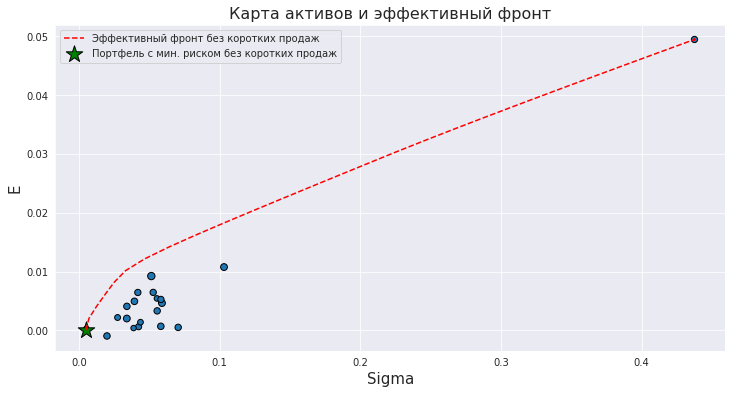

In [37]:
plot_mean_var_map(selected20, title='Карта активов и эффективный фронт')
plt.plot(psigmas_ns20, preturns_ns20, 'r--', label='Эффективный фронт без коротких продаж')
plt.scatter(min_risk_ns20, 
            min_risk_preturn_ns20,
            c='green',
            marker='*', 
            s=300, 
            edgecolors='black',
            label='Портфель с мин. риском без коротких продаж')
plt.legend()
plt.show()

## 3. Выбор оптимального портфеля по Шарпу с эфф фронта

In [38]:
from scipy import optimize
def objective_function(x, cov_matix, mean_vector, risk_free_mean):
    f = float(-(x.dot(mean_vector) - risk_free_mean) / np.sqrt(np.dot(np.dot(x, cov_matrix), x.T)))
    return f


def optimal_portfolio_sharp_ratio(profits, risk_free_mean, N, cov_matrix,returns,bounds):
    X = np.ones(N)
    X = X / X.sum()
    bounds = bounds * N
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    minimize = optimize.minimize(objective_function, X,
                    args=(cov_matrix, returns, risk_free_mean,), method='SLSQP',
                    constraints=constraints,
                    bounds=bounds).x
    return minimize

def optimal_portfolio_computing(data,risk_free_asset, allow_short = False):
    results = {}
    risk_free_mean = risk_free_asset['E'].values[0]
    N = len(data)
    r_matrix, _, cov_matrix = get_return_mean_cov(data)
    E = data['E'].values
    bounds = ((-1, 1),) if allow_short else ((0, 1),)
    optim_portfolio_weights =  optimal_portfolio_sharp_ratio(data,risk_free_mean,N,cov_matrix,E, bounds)
    results['optim_weights'] = optim_portfolio_weights
    results['best_sharp_sigma'] = risk_porfolio(optim_portfolio_weights, cov_matrix)
    results['best_sharp_return'] = np.dot(optim_portfolio_weights, E)
    results['losses'] = -np.dot(r_matrix, optim_portfolio_weights)
    return results
    
def plot_optimal_sharp_ratio_portfolio_method(data, best_sharp_sigma, best_sharp_return, short=False):
    plot_mean_var_map(data, title='Карта активов')
    short_sales_word = 'разрешением' if short else 'запретом'
    plt.scatter(best_sharp_sigma, best_sharp_return,
                marker='*', s=300, 
                label='Портфель максимальный по индексу шарпу с ' + short_sales_word + ' коротких продаж', 
                edgecolors='red')
    plt.legend()

In [39]:
risk_free = selected20.sort_values(['Sigma']).head(1)
risk_free

,names,E,Sigma,mean_vol,n_observations,symbol,sharp
CIIC,CIIG Merger Corp.,0.000226,0.005179,59490.540541,148,CIIC,0.043645


In [40]:
long_results = optimal_portfolio_computing(selected20, risk_free, allow_short=False)

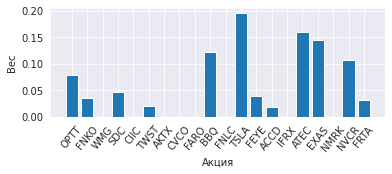

In [51]:
def plot_weights_histogram(weights, data):
    plt.figure(figsize=(6,2))
    try:
        x_values = data['symbol'].values
    except:
        x_values = data['names'].values
    d = {'stocks': x_values, 'weights': weights}
    data = pd.DataFrame(data=d)
    data.to_csv('report_finish.csv',index=False)
    x = np.arange(len(weights))
    plt.xlabel('Акция')
    plt.ylabel('Вес')
    height = weights
    plt.bar(x, height=height)
    plt.xticks(x, x_values, rotation='50')
    plt.grid()
    
plot_weights_histogram(long_results['optim_weights'], selected20)

In [15]:
import yfinance as yf
stock = yf.download("FNKO", period="1d", progress=True)

[*********************100%***********************]  1 of 1 completed


In [73]:
import pandas as pd
import yfinance as yf
import numpy as np
def calculate_return():
    stocks = pd.read_csv('report_start.csv')
    assets_returns = []
    assets_weights = stocks['weights'].values
    price_october = []
    price_november = []
    for _, stock in stocks.iterrows():
        stock_start_data = yf.download(str(stock.stocks), start="2020-10-31", progress=False)
        stock_last_data = yf.download(str(stock.stocks), start="2020-11-30", progress=False)
        print(_, round(stock_start_data['Close'][0],4))
        price_october.append(round(stock_start_data['Close'][0],4))
        price_november.append(round(stock_last_data['Close'][0],4))
        return_price = (stock_last_data['Close'][0] - stock_start_data['Close'][0]) / stock_start_data['Close'][0]
        assets_returns.append(round(return_price, 4))
    return_sum = 0
    for asset_return, asset_weight in zip(assets_returns, assets_weights):
        return_sum += asset_return * asset_weight
    assets_weights= np.round(np.array(assets_weights), 4)
    d = {'Stock': stocks['stocks'].values,'Price 31.10': price_october ,'Price 30.11': price_november ,'Return': assets_returns,'Weight in portfolio': assets_weights}
    data = pd.DataFrame(data=d)
    data.to_csv('report_finish_.csv',index=False)
    return np.around(return_sum,4)
    
portfolio_return = calculate_return()
        
print(f'Portfolio return: {portfolio_return}')


0 1.69
1 6.34
2 26.53
3 8.9
4 10.03
5 76.64
6 1.5
7 172.14
8 60.24
9 4.2
10 23.13
11 388.04
12 13.84
13 35.02
14 3.82
15 8.54
16 123.83
17 4.735
18 122.1
19 13.05
Portfolio return: 0.262


In [74]:
investment =  100000 # USA $
print('Return', round(investment + investment*portfolio_return,1))

Return 126200.0


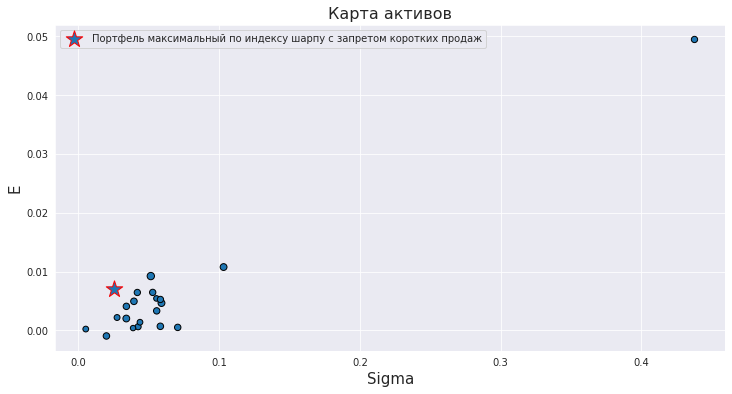

In [42]:
plot_optimal_sharp_ratio_portfolio_method(selected20, 
                                          long_results['best_sharp_sigma'],
                                          long_results['best_sharp_return'], 
                                          short=False)

## 4. Сумму под риском на 31 день вперед

In [43]:
def VaR_info(losses):
    confidence_lvl = [0.9, 0.95, 0.99]
    VaR = {}
    for clvl in confidence_lvl:
        loss = losses[np.isfinite(losses)]
        VaR[clvl] = np.quantile(loss, clvl) * np.sqrt(31)
        print(' - Потери не превысят %.4f с %.2f%s уверенностью.' % (VaR[clvl], clvl, '%'))

In [44]:
print('Потери через 31 день')
VaR_info(long_results['losses'])

Потери через 31 день
 - Потери не превысят 0.1258 с 0.90% уверенностью.
 - Потери не превысят 0.1819 с 0.95% уверенностью.
 - Потери не превысят 0.2174 с 0.99% уверенностью.


## 5. Рассчитать доходность на 31 день вперёд

In [45]:
# Веса нашего портфеля
X = long_results['optim_weights']

In [46]:
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20)

In [47]:
portfolioE = np.dot(mean_vec, X)
portfolioRisk = risk_porfolio(X, cov_matrix)

In [48]:
print('Доходность портфеля: ', round(portfolioE,4), 'Риск портфеля: ', round(portfolioRisk,4))

Доходность портфеля:  0.0066 Риск портфеля:  0.0253


In [49]:
investment =  100000 # USA $
print('Return', round(investment + investment*portfolioE,1))

Return 100661.3


## 6. Прогнозирование поведения портфеля

In [50]:
# Google Collab - pip install -U yfinance numpy pandas fbprophet matplotlib pytrends pystan
# Stocker.py засунуть в отдельную ячейку
import yfinance as yf
#import quandl
import pandas as pd
import numpy as np
import fbprophet
import pytrends
from pytrends.request import TrendReq
import yfinance
# matplotlib pyplot for plotting
import matplotlib.pyplot as plt

import matplotlib

ModuleNotFoundError: No module named 'fbprophet'

In [216]:
# доходности портфеля
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(selected20)
portfolio_returns =  np.dot(r_matrix, X)
portfolio_returns.shape

(84,)

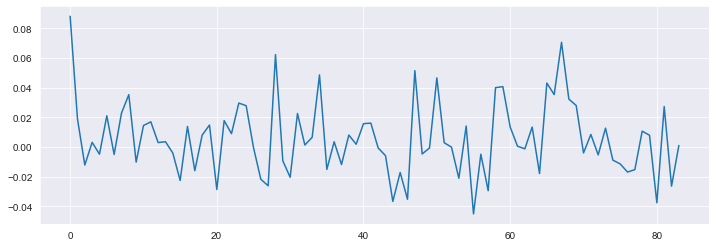

In [218]:
plt.figure(figsize=(12,4))
plt.plot(portfolio_returns)
plt.grid()
pass

In [ ]:
ixic_prophet = Stocker("^IXIC", ixic, start, end)
model, model_data = ixic_prophet.create_prophet_model(days=30)

In [ ]:
# веса равнодолевого портфеля
weights = X

In [56]:
# тупо умножаю все данные в тикере на соответствующий вес, не знаю сработает ли это, но по сути: тикеры индекса
# вроде как состовляются по такому же принципу (например, равнодолевой SSE)
def get_weighted_data(weights, ixic_stocks):
    keys = list(ixic_stocks.keys())
    df = pd.DataFrame()
    for i, w in enumerate(weights):
        df = w * ixic_stocks[keys[i]] if i == 0 else df + w * ixic_stocks[keys[i]]
    return df

In [ ]:
df = get_weighted_data(weights, ixic_stocks)

In [ ]:
portfolio_prophet = Stocker("Взвешенный портфель", df, start, end)
model, model_data = portfolio_prophet.create_prophet_model(days=30)

![alt text](data/chart.PNG)

Прогноз на взвешенную цену акций портфеля